<a href="https://colab.research.google.com/github/rafaborneo/graph_course/blob/main/Borneo_GRAFOSParte2_Puntos5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANALISIS DE GRAFOS Práctico 2. Actividad 5 y 6 (puntos y5 y se de la segunda mitad de lamateria

RAFAEL BORNEO BENISTA


## Dataset

El dataset consiste en un conjunto de hilos de tweets, con un total de ~150000 tweets, extraídos entre Enero y Marzo de 2021. La temática de los mismos está referida a la vacunación contra el covid-19 en Argentina.

Pueden descargar el dataset del siguiente [link](https://drive.google.com/file/d/1X_qKsE8muAnom2tDX4sLlmBAO0Ikfe_G/view?usp=sharing).

### Campos

- **created_at:** Fecha del tweet
- **id_str:** ID del tweet
- **full_text:** Contenido del tweet
- **in_reply_to_status_id:** ID del tweet inmediatamente anterior en el hilo
- **in_reply_to_user_id:** Autor del tweet inmediatamente anterior en el hilo
- **user.id:** Autor del tweet
- **user_retweeters:** Lista de ID de usuarios que retweetearon el tweet
- **sentiment:** Etiquetado manual que indica el sentimiento o intención del tweet con respecto al tweet anterior en el hilo

## Configuración inicial

OJO  HAY QUE SUBIR AL ENTORNO LOCAL LOS ARCHIOS DE vacunas, etiquetas, coomunidades (comm1 y comm2, resultantes del punto 4/SEGUNDA MITAD

In [7]:
!pip install igraph

In [8]:
#IMPORTAR LIBRERIAS REQUERIDAS PARA EL ANALISIS
import numpy as np
import pandas as pd
import networkx as nx
import igraph as ig
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context('talk')
#from pathlib import Path

## Descargar el csv con los datos en este directorio
#DATA_DIR = Path('C:\Users\Rafael\Documents\AREA TRABAJO\DIPLODATOS 2021\7_opt_Analisis_Grafos\clases\Practico')
#INPUT_FILE = DATA_DIR / 'vacunas.csv'

## Creamos el directorio en caso de que no exista
#DATA_DIR.mkdir(parents=True, exist_ok=True)

In [9]:
import igraph
print(igraph.__version__)

0.9.8


### Cargamos el dataset

In [12]:
dtypes = {
    'id_str': str,
    'full_text': str,
    'in_reply_to_status_id': str,
    'in_reply_to_user_id': str,
    'user.id': str
}
df = pd.read_csv("vacunas.csv", dtype=dtypes).dropna(subset=['user_retweeters'])
df['user_retweeters'] = df['user_retweeters'].apply(lambda x: [str(elem) for elem in eval(x)])
print(df.shape)
df.head(3)

(155123, 8)


,created_at,id_str,full_text,in_reply_to_status_id,in_reply_to_user_id,user.id,user_retweeters,sentiment
0,Sat Feb 20 03:09:10 +0000 2021,1362962469749153792,Seguimos esperando el comunicado de @norabar r...,NaN,NaN,2737379453,"[2258074658, 159909978, 105301854, 290671142, ...",NaN
1,Sat Feb 20 03:19:59 +0000 2021,1362965193509265417,@Clon_43 @norabar Nora estaba indignada porque...,1362962469749153792,2737379453,32718111,[],NaN
2,Mon Feb 22 23:55:08 +0000 2021,1364000806740111363,"Bueno, Alberto dijo Salud o Economía. La salud...",NaN,NaN,252168075,"[1238117630696972289, 37232479, 12792246571247...",NaN


### Calculamos la cantidad de hilos

In [13]:
roots = df[df['in_reply_to_user_id'].isna()]
roots.shape

(3174, 8)

## Actividades

### **1. Construcción del grafo** 

Construir el **grafo de retweets**, definido de la siguiente manera:

- Tipo de grafo: Dirigido
- Nodos: ID de los usuarios
- Enlaces: (Usuario A) ---> (Usuario B) si B retweeteó algún tweet de A

Con estos datos, el grafo debería tener alrededor de 40000 nodos y 90000 enlaces.

Considerar la versión no dirigida del grafo y estudiar su conectividad. Si existe una única "componente gigante", realizar el resto de las actividades sobre ella, en lugar de sobre el grafo completo.

Calcular las siguientes métricas globales del grafo:

- Grado medio
- Asortatividad
- Transitividad
- Coeficiente de clustering de Watts-Strogatz

**Opcional:** Comparar las métricas calculadas anteriormente con las de un grafo aleatorio con la misma distribución de grado. Pueden utilizar para ello este [método](https://networkx.org/documentation/stable/reference/generated/networkx.generators.degree_seq.configuration_model.html?highlight=configuration#networkx.generators.degree_seq.configuration_model). Con esto en mente, comentar si los valores obtenidos anteriormente difieren significativamente del caso aleatorio.


### **2. Centralidad**

Calcular 5 métricas de centralidad de nodos. Graficar la distribución de cada una de ellas ¿Existe alguna correlación entre las distintas centralidades? 

Hacer un ranking con los 10 nodos más centrales para cada métrica. ¿Hay coincidencia entre los rankings?. ¿Qué características tienen los usuarios más centrales y sus respectivos tweets?

**Opcional:** Determinar si existe alguna correlación entre la centralidad de un nodo y su actividad en red social. Es decir, evaluar si los usuarios que más escriben son los más centrales o no.

### **3. Comunidades**

Utilizar el algoritmo de Louvain con el parámetro "resolución" igual a 1. Caracterizar las comunidades halladas (cantidad, distribución de tamaños). Utilizar la modularidad y otras dos métricas a elección para evaluar la calidad de la partición encontrada. 

Variar el parámetro "resolución" y observar cómo cambia la distribución de comunidades encontradas. ¿Existe algún valor para el cual se identifiquen dos grandes comunidades?

Elegir otro algoritmo de detección de comunidades y comparar los resultados con los obtenidos anteriormente.

**Opcional:** Correr el algoritmo de Louvain con distintas semillas aleatorias. Utilizar alguna métrica de comparación externa entre las particiones obtenidas para determinar en qué medida depende el algoritmo de la condición inicial.

In [14]:
#expansion columna user_retweeters
df1= df.explode("user_retweeters", ignore_index=True)
print(df1.shape)


(320948, 8)


In [15]:
df1 = df1.dropna(subset=['user.id','user_retweeters'])
print(df1.shape)


(187297, 8)


In [16]:
dir_G =  nx.from_pandas_edgelist(df1, source='user.id', target='user_retweeters', edge_attr=None, create_using=None, edge_key=None)

In [17]:
print(nx.info(dir_G))

Graph with 39800 nodes and 93404 edges


In [10]:
#importar pytorch QUE VA A SER USADO EN ESTA PARTE DEL PRACTICO

In [18]:
import torch

def format_pytorch_version(version):
    return version.split('+')[0]

TORCH_version = torch.__version__
TORCH = format_pytorch_version(TORCH_version)

def format_cuda_version(version):
    return 'cu' + version.replace('.', '')

CUDA_version = torch.version.cuda
CUDA = format_cuda_version(CUDA_version)

!pip install torch-scatter     -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-sparse      -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-cluster     -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-geometric 

Looking in links: https://pytorch-geometric.com/whl/torch-1.10.0+cu111.html
     |████████████████████████████████| 7.9 MB 5.4 MB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.10.0+cu111.html
     |████████████████████████████████| 3.5 MB 5.4 MB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.10.0+cu111.html
     |████████████████████████████████| 2.3 MB 5.2 MB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.10.0+cu111.html
     |████████████████████████████████| 747 kB 5.0 MB/s 
     |████████████████████████████████| 325 kB 5.2 MB/s 
     |████████████████████████████████| 407 kB 36.8 MB/s 
     |████████████████████████████████| 45 kB 2.2 MB/s 
  Created wheel for torch-geometric: filename=torch_geometric-2.0.2-py3-none-any.whl size=535570 sha256=647003923ccb065441d7fb0ecfc03dee446b80675c3ec0e3680969dc11c7093f
  Stored in directory: /root/.cache/pip/wheels/3f/08/13/2321517088bb2e95bfd0e45033bb9c923189e5b2078e0be4ef
Successfully built to

Actividades
5. Embedding de nodos
Generar un embedding del grafo de retweets utilizando el algoritmo word2vec. Reducir a 2 la dimensionalidad del embedding utilizando PCA y t-SNE. Graficar los embeddings correspondientes a los datos etiquetados. ¿Es posible diferenciar unos de otros?

Opcional: Graficar además los embeddings de los nodos que forman parte de las comunidades asociadas a cada clase. Determinar si el embedding permite distinguir cada comunidad.

In [19]:
## usar CPU o GPU para los cálculos?
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

Using cpu device


In [20]:
#gENERAR MATRICES
adj = nx.to_scipy_sparse_matrix(dir_G).tocoo()
row = torch.from_numpy(adj.row.astype(np.int64)).to(torch.long)
col = torch.from_numpy(adj.col.astype(np.int64)).to(torch.long)
edge_index = torch.stack([row, col], dim=0)
print(edge_index.shape)

torch.Size([2, 186464])


In [22]:
# IMPORTAR Y DEFINIR MODELO
from torch_geometric.nn import Node2Vec
modelo = Node2Vec(
    edge_index, embedding_dim=100, walk_length=10, 
    context_size=4, num_negative_samples=5
).to(device)

## USO loader PARA TRABAJAR EN CHUNKS, 

loader = modelo.loader(batch_size=128, shuffle=True)

## Optimizador
optimizer = torch.optim.Adam(list(modelo.parameters()), lr=0.01)

In [25]:
def train():
    ## ENTRENAMIENTO
    modelo.train()

    total_loss = 0
    for pos_rw, neg_rw in loader:

        ## Reseteamos los gradientes
        optimizer.zero_grad()

        ## Calculamos el error (la función de costo) del lote
        ## en función de los samples positivos y negativos
        loss = modelo.loss(pos_rw.to(device), neg_rw.to(device))

        ## Hacemos backpropagation
        loss.backward()

        ## Avanzamos un paso
        optimizer.step()

        ## Actualizamos la función de costo total
        total_loss += loss.item()

    return total_loss / len(loader)

In [29]:
epochs = 20
for epoch in range(epochs):
    loss = train()
    if epoch % 5 == 0:
        print(f'Epoch: {epoch:3} - Loss: {loss:.3f}')

Epoch:   0 - Loss: 0.911
Epoch:   5 - Loss: 0.883
Epoch:  10 - Loss: 0.882
Epoch:  15 - Loss: 0.878


In [30]:
def get_embedding():
    modelo.eval()
    with torch.no_grad():
        nodes = torch.arange(dir_G.number_of_nodes(), device=device)
        embedding = modelo(nodes).detach().numpy()
    return embedding

embedding = get_embedding()

In [33]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [41]:
dtypes = {'user': str}
df_etiq = pd.read_csv(('etiq.csv'),dtype=dtypes)

In [42]:
dtypes = {'comm_1': str}
comm_1 = pd.read_csv(('comm_1.csv'), dtype=dtypes)

In [43]:
dtypes = {'comm_2': str}
comm_2 = pd.read_csv(('comm_2.csv'), dtype=dtypes)

In [46]:
df_etiq.shape

(152, 8)

In [44]:
etiquetas_0 = [i for i, v in enumerate(dir_G.nodes()) if v in (list(df_etiq[df_etiq['Clase']==0]['user']))]
etiquetas_1 = [i for i, v in enumerate(dir_G.nodes()) if v in (list(df_etiq[df_etiq['Clase']==1]['user']))]

comunid_1 = [i for i, v in enumerate(dir_G.nodes()) if v in (list(comm_1['comm_1']))] 
comunid_2 = [i for i, v in enumerate(dir_G.nodes()) if v in (list(comm_2['comm_2']))] 

In [34]:
pca = PCA(n_components=2, random_state=22).fit_transform(embedding)

In [47]:
tsne = TSNE(n_components=2, learning_rate='auto', init='pca', random_state=22).fit_transform(embedding)
##TENGO PROBLEMAS CON TSNE , NO ME CORRE EN COLAB (???????)
#CREO QUE ELCODIGO ESTA BIEN
#TARDO MUCHO PERO CORRIO

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


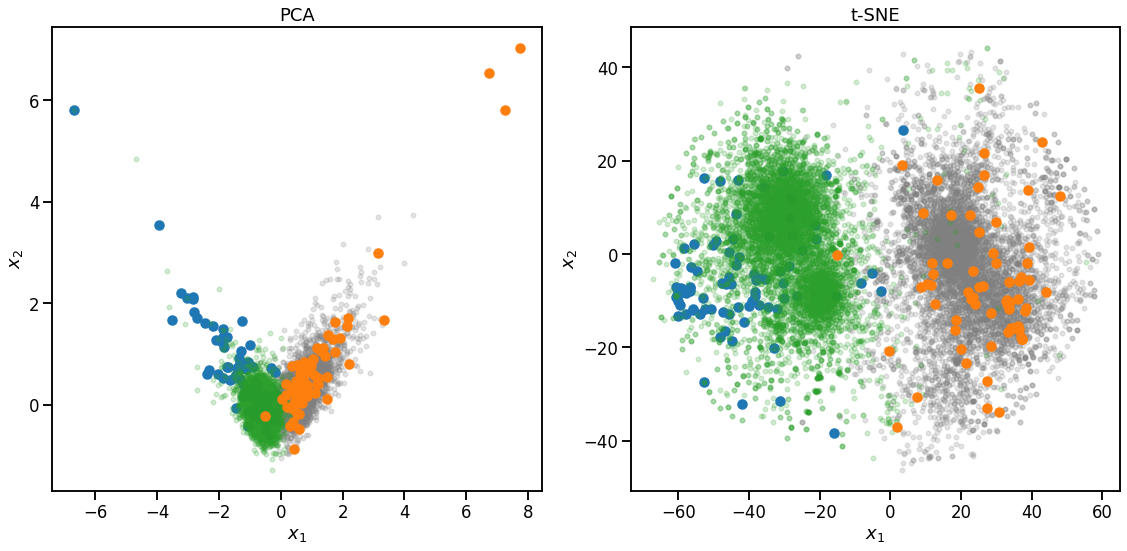

In [49]:
#GRAFICOS DE PCA Y TSNE
color = 'C0' 
ncols = 2
fig, axes = plt.subplots(figsize=(8*ncols, 8), ncols=2)
ax = axes[0]
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_title('PCA')
x, y = pca[comunid_2][:,0],pca[comunid_2][:,1]
ax.scatter(x,y, c='gray', marker='.', alpha=0.2)
x, y = pca[etiquetas_0][:,0],pca[etiquetas_0][:,1]
ax.scatter(x,y, c='C0')
x, y = pca[comunid_1][:,0],pca[comunid_1][:,1]
ax.scatter(x,y, c='C2', marker='.', alpha=0.2)
x, y = pca[etiquetas_1][:,0],pca[etiquetas_1][:,1]
ax.scatter(x,y, c='C1')

ax = axes[1]
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_title('t-SNE')
x, y = tsne[comunid_2][:,0],tsne[comunid_2][:,1]
ax.scatter(x,y, c='gray', marker='.', alpha=0.2)
x, y = tsne[etiquetas_0][:,0],tsne[etiquetas_0][:,1]
ax.scatter(x,y,c='C0')
x, y = tsne[comunid_1][:,0],tsne[comunid_1][:,1]
ax.scatter(x,y, c='C2', marker='.', alpha=0.2)
x, y = tsne[etiquetas_1][:,0],tsne[etiquetas_1][:,1]
ax.scatter(x,y,c='C1')

plt.tight_layout()
plt.show()

TANTO POR PCA COMO POR TSNE SE APRECIAN DOS GRANDES GRUPOS DE TWITEROS. Ademas el  Node2Vec logroseparar logró diferenciar la clase 0 de la clase 1 (que representan mayor apoyo entre usuarios del grafo).

Se nota, además, como logró captar las dos grandes comunidades a las cuales pertenecen casi la totalidad de los usuarios representados por las 0 y 1.